# Things to add to the Project:

1. Word Clouds
2. Best reviewed artists for genres
3. Worst reviewed artists for genres
4. Score differences between genres
5. Top reviewers scores for albums
6. Top reviewers scores by genre & differences
7. Best new music scores
8. Music Labels scores

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for plotting

In [2]:
# Download the dataset from Kaggle at https://www.kaggle.com/bcyphers/pitchfork-reviews/download
# Extract the zip and retrieve "reviews.csv"

In [3]:
raw_data = pd.read_csv("C:/Users/Home/Downloads/reviews.csv/reviews.csv")
raw_data.head(3)

,reviewid,Unnamed: 0,title,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,reviewid.1,content,genre,label,artist
0,22703,0,mezzanine,http://pitchfork.com/reviews/albums/22703-mezz...,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017,22703,"“Trip-hop” eventually became a ’90s punchline,...",electronic,virgin,massive attack
1,22721,1,prelapsarian,http://pitchfork.com/reviews/albums/22721-prel...,7.9,0,zoe camp,contributor,2017-01-07,5,7,1,2017,22721,"Eight years, five albums, and two EPs in, the ...",metal,hathenter,krallice
2,22659,2,all of them naturals,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017,22659,Minneapolis’ Uranium Club seem to revel in bei...,rock,static shock,uranium club


In [4]:
# Drop columns we won't be needing
raw_data.drop(['url', 'pub_weekday', 'pub_day', 'pub_month',  'reviewid.1', 'Unnamed: 0'], axis = 1, inplace = True)
raw_data.head(3)

,reviewid,title,score,best_new_music,author,author_type,pub_date,pub_year,content,genre,label,artist
0,22703,mezzanine,9.3,0,nate patrin,contributor,2017-01-08,2017,"“Trip-hop” eventually became a ’90s punchline,...",electronic,virgin,massive attack
1,22721,prelapsarian,7.9,0,zoe camp,contributor,2017-01-07,2017,"Eight years, five albums, and two EPs in, the ...",metal,hathenter,krallice
2,22659,all of them naturals,7.3,0,david glickman,contributor,2017-01-07,2017,Minneapolis’ Uranium Club seem to revel in bei...,rock,static shock,uranium club


In [5]:
# Check the datatypes of the dataset
# raw_data['author'] = raw_data['author'].astype(str)
raw_data.dtypes

reviewid            int64
title              object
score             float64
best_new_music      int64
author             object
author_type        object
pub_date           object
pub_year            int64
content            object
genre              object
label              object
artist             object
dtype: object

In [6]:
# Check for null values in the dataset
print(pd.isnull(raw_data).sum())

reviewid             0
title                2
score                0
best_new_music       0
author               0
author_type       3904
pub_date             0
pub_year             0
content             10
genre             2364
label               47
artist               2
dtype: int64


# Change the score of albums to whole numbers

In [7]:
# Change the score number to a whole number ranging from 1 - 100
increase_score = raw_data['score'] * 10

In [8]:
raw_data['score'] = increase_score
raw_data['score'] = raw_data['score'].astype(int)
raw_data.head(3)

,reviewid,title,score,best_new_music,author,author_type,pub_date,pub_year,content,genre,label,artist
0,22703,mezzanine,93,0,nate patrin,contributor,2017-01-08,2017,"“Trip-hop” eventually became a ’90s punchline,...",electronic,virgin,massive attack
1,22721,prelapsarian,79,0,zoe camp,contributor,2017-01-07,2017,"Eight years, five albums, and two EPs in, the ...",metal,hathenter,krallice
2,22659,all of them naturals,73,0,david glickman,contributor,2017-01-07,2017,Minneapolis’ Uranium Club seem to revel in bei...,rock,static shock,uranium club


# Create two dataframes based on if an author has less than 100 reviews/more than or equal to 100 reviews

In [9]:
strings = raw_data['author'].value_counts()[:52].index # 52 authors over 100 reviews or more

# Create a list containing the authors with >= 100 reviews
author_names = []
for x in strings:
    author_names.append(x)

In [10]:
raw_data['author'].value_counts(normalize = True)[:52].sum() # percentage of all reviews

0.6833260822275397

In [11]:
(raw_data['author'].value_counts() >= 100).sum() # proves how many authors have over 100 reviews or more

52

In [12]:
author_less = []
strings = raw_data['author'].value_counts()[52:].index
for x in strings:
    author_less.append(x)

In [13]:
# get the indices of the authors with >= 100 reviews, needed for data cleaning
keep_indices = []
increment = -1
for i in raw_data['author']: # iterate through the author column of the dataframe
    increment += 1 # increase when the iteration for the row has been complete to check if the author is in the list
    for j in range(len(author_names)): # iterate through the names with >= 100 reviews
        if i == author_names[j]: # check if they are the same
           keep_indices.append(increment) # append the indice

In [14]:
# compare if the amonut of reviews is the same as the authors total reviews with >= 100 
print(len(keep_indices))
print(raw_data['author'].value_counts()[:52].sum())

12565
12565


In [15]:
# get the indices we want to drop
remove_indices = []
increment = -1
for i in raw_data['author']:
    increment += 1
    for j in range(len(author_less)):
        if i == author_less[j]:
            remove_indices.append(increment)

In [16]:
# compare if the amonut of reviews is the same as the authors total reviews with >= 100 
print(len(remove_indices))
print(raw_data['author'].value_counts()[52:].sum())

5823
5823


In [17]:
subdata = raw_data.drop(remove_indices)
subdata['author'].value_counts() # check if the <= 100 reviews have been removed

joe tangari             815
stephen m. deusner      725
ian cohen               699
brian howe              500
mark richardson         476
stuart berman           445
marc hogan              439
nate patrin             347
marc masters            312
jayson greene           299
grayson currin          289
brandon stosuy          287
matthew murphy          274
jess harvell            273
dominique leone         273
andrew gaerig           270
rob mitchum             267
jason crock             267
andy beta               249
paul thompson           222
joshua klein            217
larry fitzmaurice       217
chris dahlen            214
nick neyland            211
philip sherburne        209
adam moerder            209
tom breihan             208
amanda petrusich        200
matt lemay              196
ryan dombal             174
mike powell             160
david raposa            155
zach kelly              153
sam ubl                 152
nitsuh abebe            144
eric harvey         

In [18]:
# created dataframe with authors < 100 reviews
less100data = raw_data.drop(keep_indices)
less100data['author'].value_counts()

aaron leitko                                   97
brent dicrescenzo                              93
zach baron                                     89
tim finney                                     86
ryan schreiber                                 85
rebecca raber                                  84
jonah bromwich                                 81
david bevan                                    80
matthew perpetua                               70
brad haywood                                   69
zoe camp                                       69
andy o'connor                                  67
david drake                                    66
jason nickey                                   65
cory d. byrom                                  63
christopher dare                               62
kim kelly                                      62
jordan sargent                                 59
sean fennessey                                 59
cameron macdonald                              58


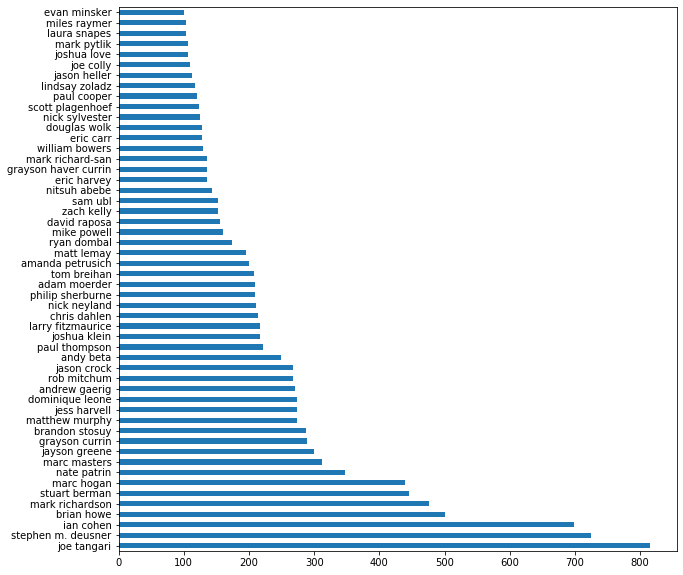

In [19]:
plt.figure(figsize = (10,10))
subdata['author'].value_counts().plot(kind='barh')

In [23]:
total = raw_data['genre'].value_counts(ascending = True)
authors100 = subdata['genre'].value_counts(ascending = True)
less100 = less100data['genre'].value_counts(ascending = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

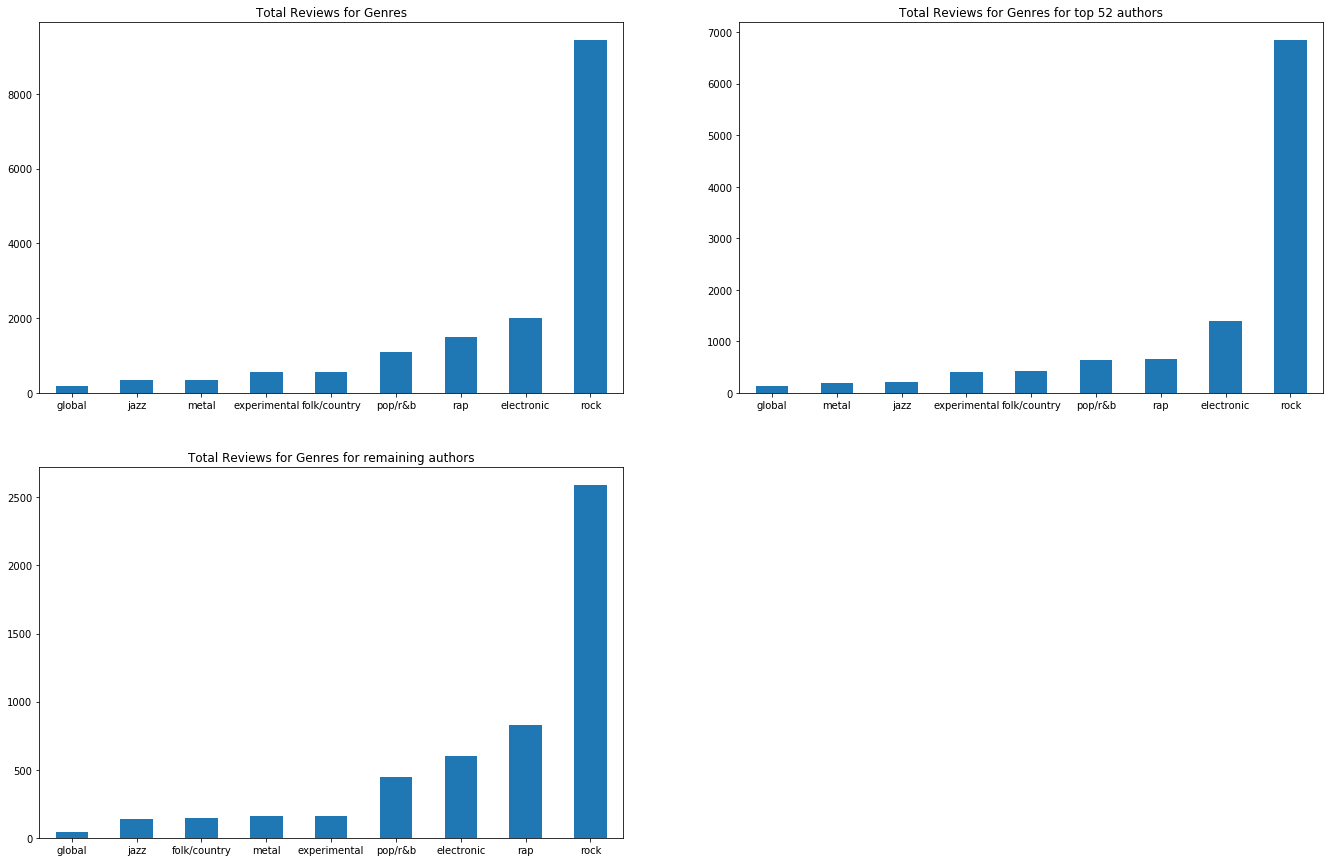

In [60]:
fig = plt.figure(figsize = (23, 15), edgecolor = 'Red')


ax1 = fig.add_subplot(2, 2, 1)
total.plot(ax = ax1, kind = 'bar', title = 'Total Reviews for Genres')
plt.xticks(rotation = 'horizontal')

ax2 = fig.add_subplot(2, 2, 2)
authors100.plot(ax = ax2, kind = 'bar', title = 'Total Reviews for Genres for top 52 authors')
plt.xticks(rotation = 'horizontal')

ax3 = fig.add_subplot(2, 2, 3)
less100.plot(ax = ax3, kind = 'bar', title = 'Total Reviews for Genres for remaining authors')
plt.xticks(rotation = 'horizontal')